Water level data associated with Lake Mead is available at [this link](https://www.usbr.gov/lc/region/g4000/riverops/_HdbWebQuery.html). We download the data and parse it for further use

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import json
from datetime import datetime

In [2]:
# We use a dataset downloaded from the above link with the following settings:
# HDB: Lower Colorado Regional Office
# SDI: 1930
# Data frequency, type: daily, Observed
# Output type: JSON

# Load the downloaded data
data_file = Path('../data/accumweb_09192023.json')
with open(data_file, 'r') as f:
    data = json.load(f)

In [3]:
# Function that parses a JSON loaded into a dict, and returns datestamps and the associated water levels
def parse_dict(input_dict):
    datestr = input_dict['t']
    month, day, year = [int(x) for x in datestr.split(" ")[0].split("/")]
    
    date = datetime(year=year, month=month, day=day)
    water_level = float(input_dict['v'])

    return (date, water_level)

In [4]:
dataset = list(map(parse_dict, data['Series'][0]['Data'][:-1])) # the last data entry has a null value for water level, we skip this
x = [entry[0] for entry in dataset]
y = [entry[1] for entry in dataset]

/var/folders/0j/_hzqdqys6wg5g5khfdl7tdk00000gr/T/ipykernel_34145/3283241486.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, fontsize=14, rotation=45)


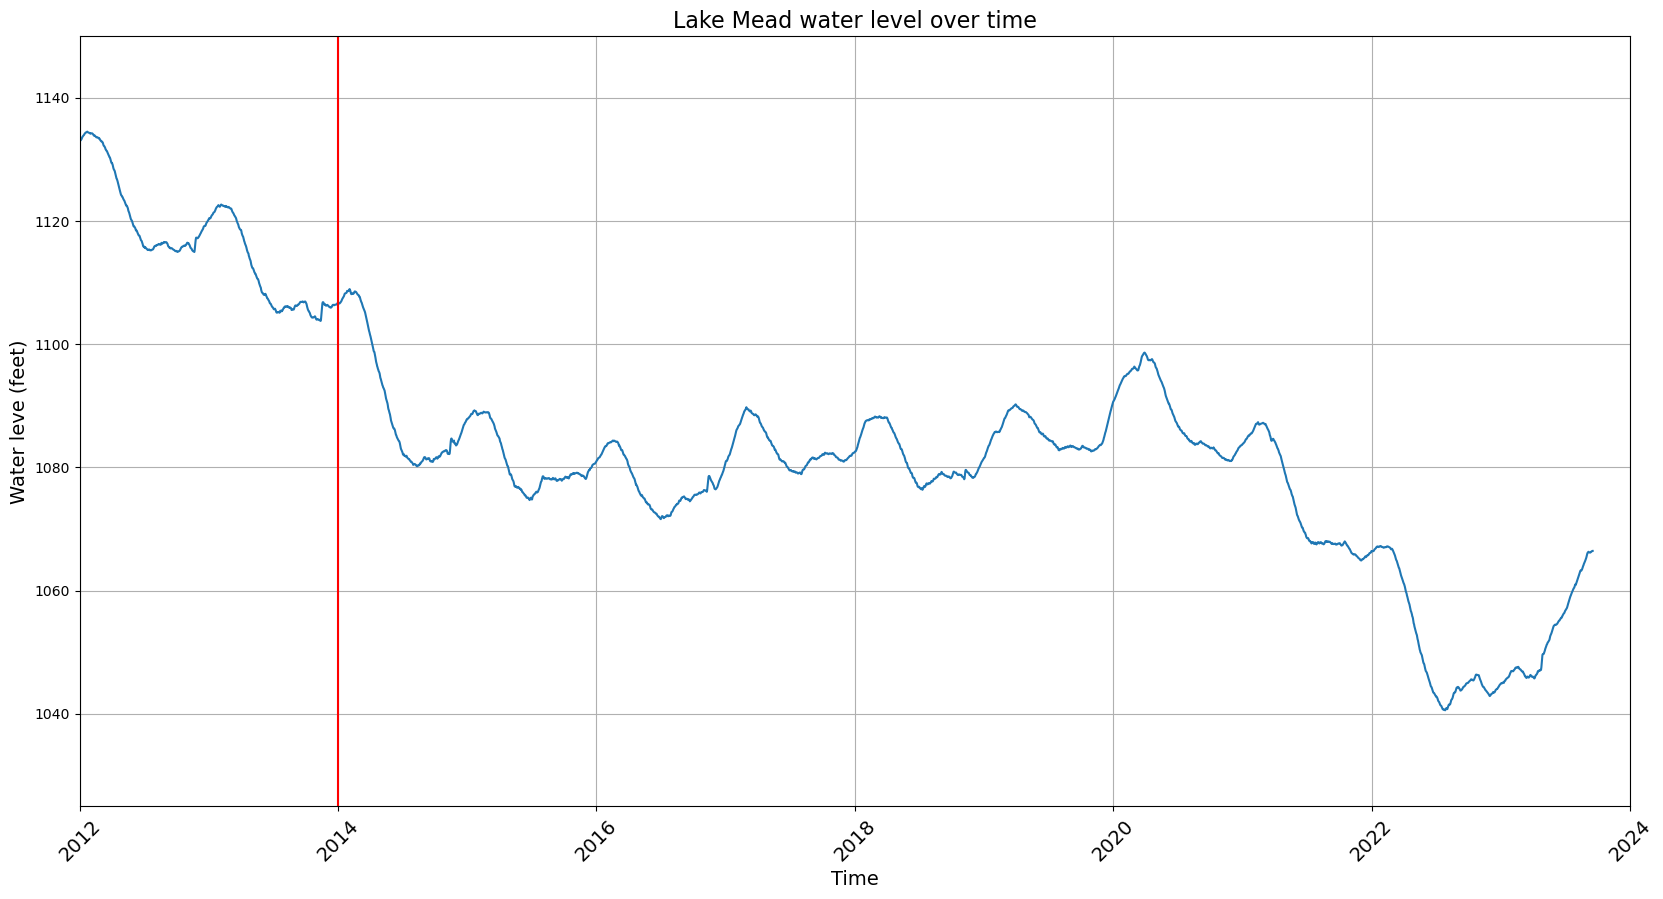

In [5]:
years = list(range(2014, 2023))
date = datetime(year=2014, month=1, day=1)
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(x, y)
ax.set_xlim(datetime(year=2012, month=1, day=1), datetime(year=2024, month=1, day=1))
xticklabels = ax.get_xticklabels()
ax.set_xticklabels(xticklabels, fontsize=14, rotation=45)
ax.set_ylim([1025, 1150])
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Water leve (feet)", fontsize=14)
ax.set_title("Lake Mead water level over time", fontsize=16)
ax.grid()

ylims = ax.get_ylim()
ax.plot([date, date], ylims, color = 'red')